In [1]:
import pandas as pd
import matplotlib.pyplot as plt

We use `read_csv()` to read url data and create a DF for the same.

In [2]:
url = ("https://raw.githubusercontent.com/fivethirtyeight/"
        "data/master/college-majors/recent-grads.csv"
      )

df = pd.read_csv(url)
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


Making plot using `plot()`, which will return a line graph containing data from every row in DF.

Note that `plot()` is a wrapper for `pyplot.plot()`, and the result with using that will be identical.

<Axes: xlabel='Rank'>

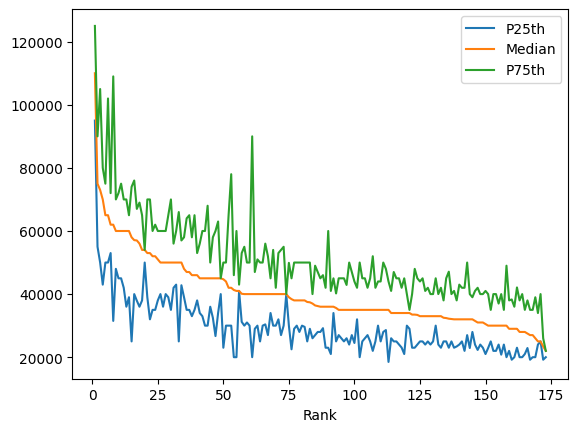

In [3]:
df.plot(x="Rank", y=["P25th", "Median", "P75th"])
# Median is median earnings
# P25th is 25th percentile earnings
# P75th is 75th percentile earnings

We can observe median income decreases as rank decreased as rank is determined by the median income.

Some majors have large gaps between 25th and 75th percentiles, while others have very small gaps, and are close to the median.

In [4]:
median_column = df["Median"]
median_column

,Median
0,110000
1,75000
2,73000
3,70000
4,65000
...,...
168,26000
169,25000
170,25000
171,23400


**Histogram**

Good way to visualize how values are distributed across a dataset. Histograms group values into bins and display a count of the data points whose values are in a particular bin.

<Axes: ylabel='Frequency'>

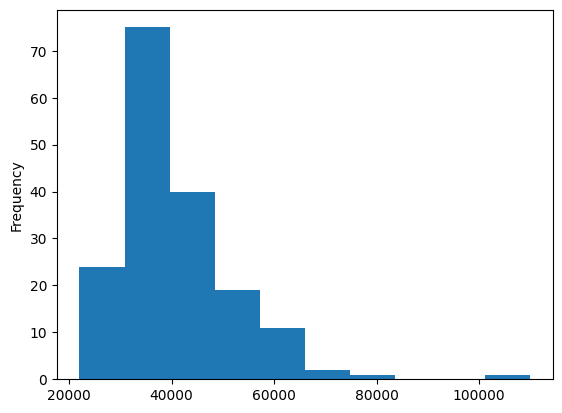

In [5]:
median_column.plot(kind = "hist")

**Outliers**

A Histogram can help detect an Outlier.

**Correlation**

To see whether two columns are connected. For e.g., if you pick a college major with higher median earnings, is there a lower chance of unemployment?

With scatter plot, we can get a first impression about possible correlation.

<Axes: xlabel='Median', ylabel='Unemployment_rate'>

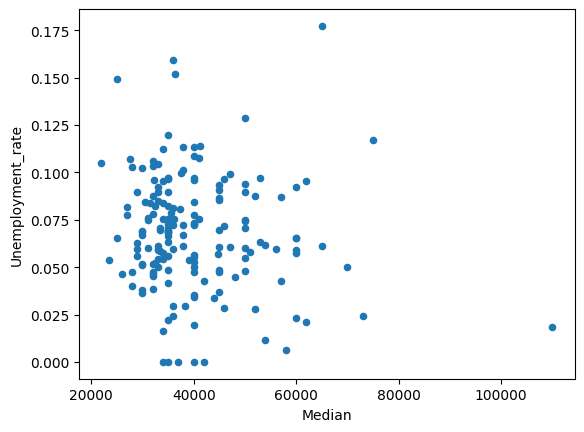

In [6]:
df.plot(x = "Median", y = "Unemployment_rate", kind = "scatter")

From figure we can see there's no significant correlation between the earnings and unemployment rate.

We can also use `corr()` to check correlation value between different columns. It ranges between -1 and 1, with 1 implying strong positive correlation, and -1 implying strong negative correlation.

In [7]:
# Select only numeric columns before calculating the correlation
df_numeric = df.select_dtypes(include = ['number'])

df_numeric.corr()["Median"]["Unemployment_rate"]

-0.10883329389733636

**Grouping**

Most datasets contain some explicit or implicit categorization. In current dataset, the 173 college majors are divided into 16 subject area categories.

Using `groupby()`, we create `DataFrameGroupBy` object.

In [8]:
cat_totals = df.groupby("Major_category")["Total"].sum().sort_values()
cat_totals

,Total
Major_category,
Interdisciplinary,12296.0
Agriculture & Natural Resources,75620.0
Law & Public Policy,179107.0
Physical Sciences,185479.0
Industrial Arts & Consumer Services,229792.0
Computers & Mathematics,299008.0
Arts,357130.0
Communications & Journalism,392601.0
Biology & Life Science,453862.0


<Axes: ylabel='Major_category'>

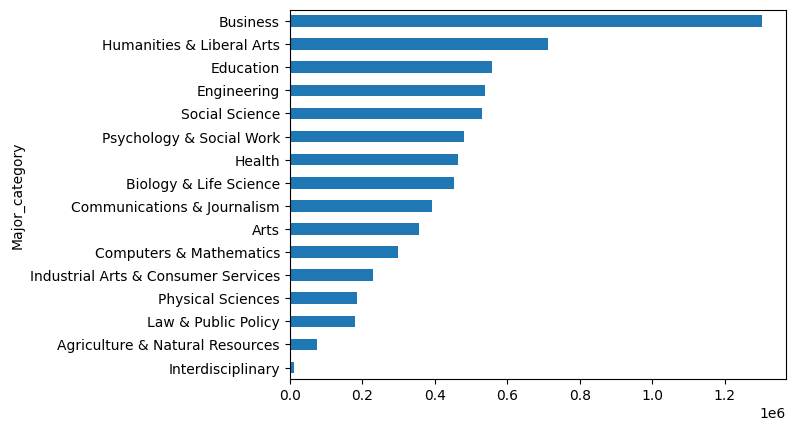

In [9]:
# Create a horizontal bar chart for the grouping
cat_totals.plot(kind = "barh")

We can clearly see that business is by far the most popular major category. Same can be seen by using a Pie chart.

<Axes: ylabel='Total'>

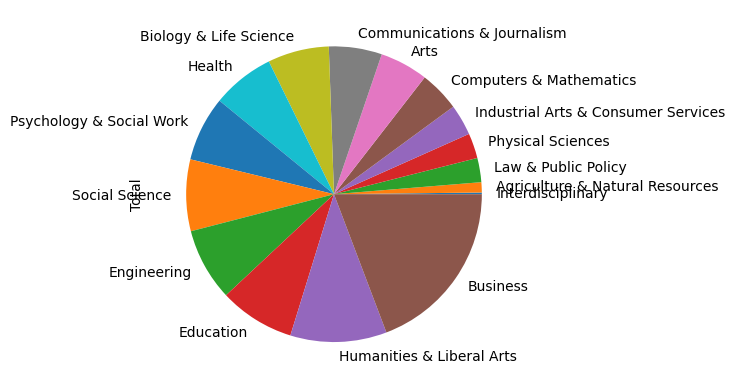

In [10]:
cat_totals.plot(kind = "pie")

We can see smaller categories get overlapped, we can create a seperate group for them.

<Axes: >

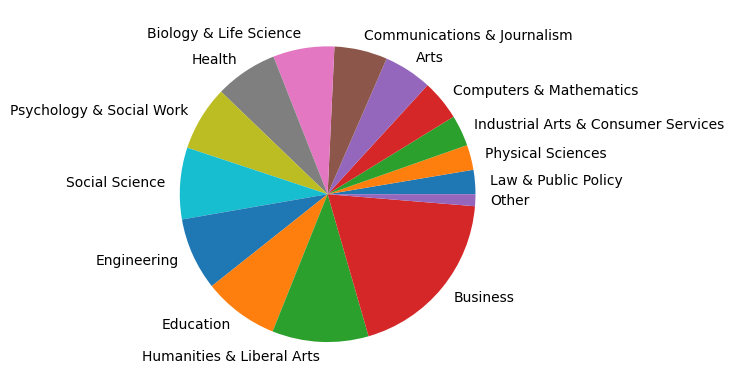

In [11]:
other_total = cat_totals[cat_totals < 100_000].sum()

cat_totals = cat_totals[cat_totals >= 100_000]

# Add a Other category
cat_totals["Other"] = other_total

cat_totals.plot(kind= "pie", label = "")